# Project 2:  Holiday weather

by Kwadwo Ntiamoah, 11 September 2015

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to have two weeks off relaxing in my garden in London. However I'm often disappointed because I pick a fortnight when the weather is dull and it rains. So in this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2016 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

If you haven't already downloaded the dataset for London right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'London' in the 'Location' input box and when the pop up menu comes up with the option 'London, United Kingdom' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data  and then right click on the blue link labelled 'Comma Delimited File':

- if you are using the Safari Browser choose Download Linked File As ... 
- if you are using the Chrome Browser choose Save Link As ... 

then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'London_2014.csv'.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [8]:
from pandas import *
ghana = read_csv('Ghana_2014.csv', skipinitialspace=True)

##Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [9]:
ghana = ghana.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [10]:
ghana['WindDirDegrees'] = ghana['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [11]:
ghana['WindDirDegrees'] = ghana['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [12]:
ghana['GMT'] = to_datetime(ghana['GMT'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [13]:
ghana.index = ghana['GMT']

##Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the nothern hemisphere(above the equator) I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [14]:
summer = ghana.ix[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [21]:
summer[summer['Mean TemperatureC'] >= 25]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,31,28,25,25,23,22,94,81,62,...,18,11,10,29,13,NaN,0.00,1,NaN,253
2014-06-02,2014-06-02,30,27,24,25,23,22,89,82,66,...,14,10,0,130,14,NaN,0.00,3,NaN,220
2014-06-03,2014-06-03,32,28,24,25,24,23,94,78,53,...,14,12,10,27,10,NaN,0.00,3,NaN,224
2014-06-04,2014-06-04,33,28,23,26,24,23,100,81,53,...,19,11,8,32,16,NaN,0.00,4,Rain-Thunderstorm,238
2014-06-05,2014-06-05,28,26,23,25,24,22,100,94,79,...,11,8,3,23,10,26,40.89,5,Rain-Thunderstorm,250
2014-06-06,2014-06-06,29,26,22,25,24,23,100,86,63,...,14,10,10,23,10,NaN,0.00,5,Rain,245
2014-06-07,2014-06-07,29,27,24,25,23,22,94,87,68,...,14,11,10,29,13,NaN,0.00,2,NaN,243
2014-06-08,2014-06-08,30,27,23,24,23,22,100,78,56,...,18,13,10,23,11,NaN,0.00,3,NaN,193
2014-06-09,2014-06-09,31,28,25,25,24,23,94,83,56,...,18,11,10,26,14,NaN,0.00,4,NaN,228


In [29]:
summer[summer['Mean TemperatureC'] <= 24]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-07-02,2014-07-02,25,24,24,24,24,23,100,95,87,...,14,9,5,19,10,NaN,32.00,4,Rain-Thunderstorm,246
2014-07-04,2014-07-04,26,23,22,24,22,20,94,89,78,...,14,10,10,29,11,NaN,0.25,5,Rain,257
2014-07-05,2014-07-05,27,24,22,24,23,23,100,92,77,...,14,10,8,27,11,NaN,0.00,5,Rain-Thunderstorm,231
2014-07-06,2014-07-06,27,24,23,24,23,22,100,90,79,...,14,10,8,27,13,NaN,3.05,6,Rain,225
2014-07-16,2014-07-16,24,23,21,24,23,21,94,90,81,...,14,10,9,24,16,NaN,0.00,6,Rain,266
2014-07-17,2014-07-17,26,24,23,24,23,23,100,92,83,...,14,9,4,24,10,NaN,0.00,8,Rain,228
2014-07-23,2014-07-23,25,24,23,23,22,22,94,86,73,...,14,10,10,27,14,NaN,0.00,7,NaN,231
2014-07-24,2014-07-24,26,24,23,23,23,22,100,90,73,...,14,10,6,27,18,NaN,0.51,8,Rain,213
2014-07-27,2014-07-27,26,24,24,23,23,22,94,88,78,...,10,10,10,26,18,NaN,0.00,7,NaN,209


In [33]:
ghana.sort('Mean TemperatureC')

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-08-26,2014-08-26,24,22,21,23,22,21,100,95,88,...,14,8,2,27,19,NaN,54.10,5,Rain-Thunderstorm,218
2014-07-16,2014-07-16,24,23,21,24,23,21,94,90,81,...,14,10,9,24,16,NaN,0.00,6,Rain,266
2014-07-04,2014-07-04,26,23,22,24,22,20,94,89,78,...,14,10,10,29,11,NaN,0.25,5,Rain,257
2014-08-11,2014-08-11,27,24,23,22,22,21,94,82,70,...,14,11,10,29,21,NaN,0.00,4,NaN,216
2014-07-27,2014-07-27,26,24,24,23,23,22,94,88,78,...,10,10,10,26,18,NaN,0.00,7,NaN,209
2014-09-24,2014-09-24,27,24,23,25,23,23,94,91,77,...,18,9,4,24,16,NaN,5.08,6,Rain-Thunderstorm,241
2014-07-17,2014-07-17,26,24,23,24,23,23,100,92,83,...,14,9,4,24,10,NaN,0.00,8,Rain,228
2014-08-06,2014-08-06,26,24,23,24,23,22,100,93,82,...,18,10,8,27,19,NaN,0.00,8,Rain,217
2014-08-07,2014-08-07,26,24,23,24,23,23,100,94,84,...,14,9,1,27,16,NaN,5.08,7,Rain,208


Summer 2014 was very warm in Accra: there are many days with temperatures of 25 Celsius or higher but the conditions  became cooler near the end of summer. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [16]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

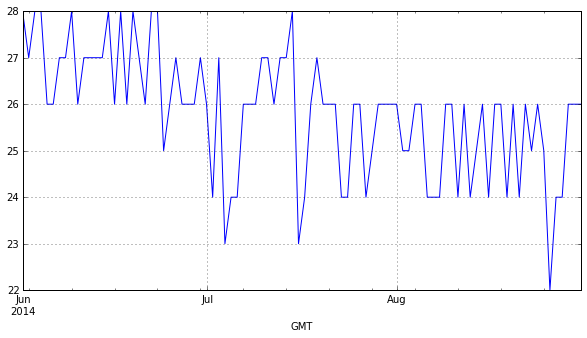

In [17]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July looks okay for mean temperatures over 24 degrees C so let's also put precipitation on the graph too:

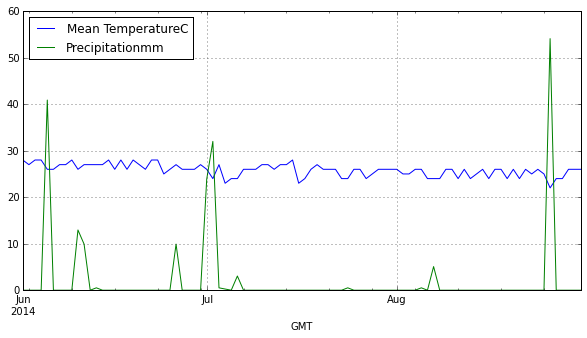

In [18]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second half of July is looking okay, with just a couple of peaks showing heavy rain. Lets have a closer look by just plotting mean temperature and precipitation for July.  

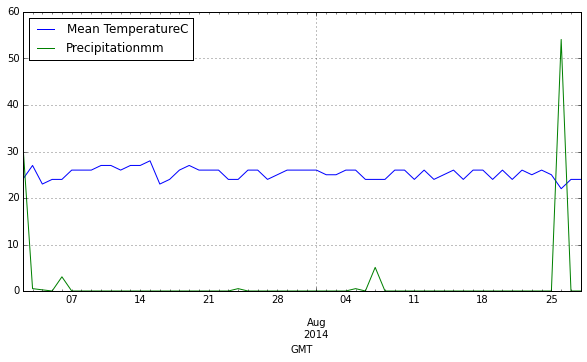

In [30]:
july = summer.ix[datetime(2014,7,2) : datetime(2014,8,28)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

After a bit more research , I found out the best period in July, the weather looks cool with days having mean temperatures below 25 degrees. With the only significant rainfall in August.

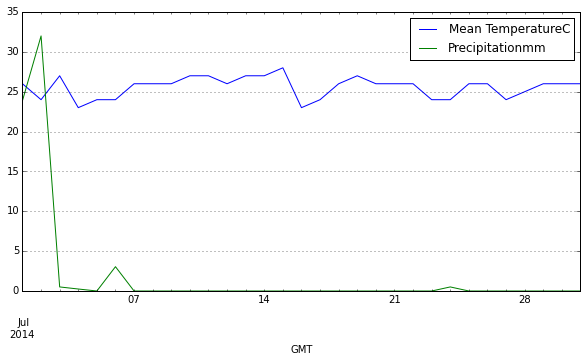

In [19]:
july = summer.ix[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, second half of July looks pretty good, just one day has significant rain, the 2nd and there is no day when the mean temperature drops below 20 degrees, .

## Conclusions

The graphs have shown the volatility of a Ghanaian summer,very warm for the large part, but a couple of weeks were found when the weather wasn't too bad in 2014.If you were in 2014 i would recommend visiting near the end of July. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.